In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

1. A --- с большой невязкой

In [27]:
n = 5
A = np.zeros(shape = (n, n))
for i in range(n):
    A[i, i] = 1
    for j in range(i + 1, n):
        A[i, j] = -1

print(A)
x = np.ones(n)
b = np.dot(A, x)

x_pred = np.linalg.solve(A, b)
err = np.sqrt(((x - x_pred)**2).sum())
b_pred = A @ x_pred
resid = np.sqrt(((b - b_pred)**2).sum())
print(f"Ошибка: {err}, невязка: {resid}")

[[ 1. -1. -1. -1. -1.]
 [ 0.  1. -1. -1. -1.]
 [ 0.  0.  1. -1. -1.]
 [ 0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  1.]]
Ошибка: 0.0, невязка: 0.0


In [28]:
N = 100
errors = []

for n in range(5, 1000, 100):
    A = np.zeros(shape = (n, n))
    for i in range(n):
        A[i, i] = 1
        for j in range(i + 1, n):
            A[i, j] = -1
    x = np.ones(n)
    b = np.dot(A, x)
    x_pred = np.linalg.solve(A, b)
    errors.append(np.sqrt(((x - x_pred)**2).sum()))

errors

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

2. Добавим ошибку в последнюю координату b

/var/folders/rz/q38y2crj2378lqt648zw0cbr0000gn/T/ipykernel_23694/3362105307.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


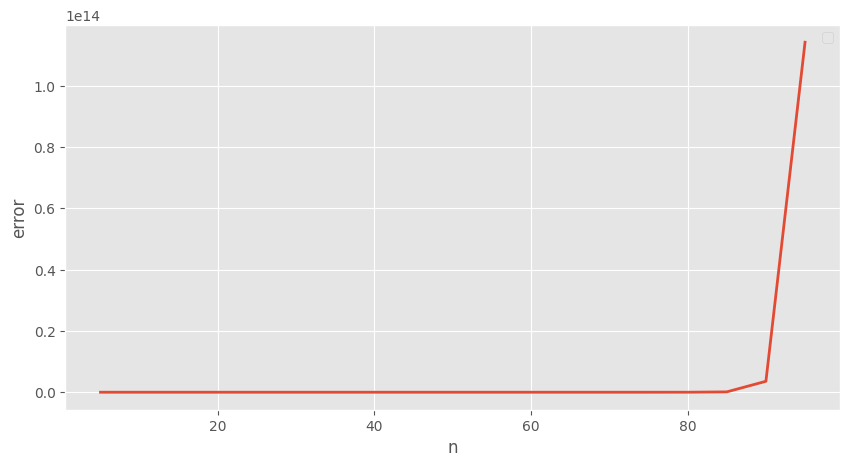

In [29]:
errors = []

for n in range(5, 100, 5):
    A = np.zeros(shape = (n, n))
    for i in range(n):
        A[i, i] = 1
        for j in range(i + 1, n):
            A[i, j] = -1
    x = np.ones(n)
    b = np.dot(A, x)
    eps = np.zeros_like(b)
    eps[-1] = 1e-14
    x_pred = np.linalg.solve(A, b+eps)
    errors.append(np.sqrt(((x - x_pred)**2).sum()))

    
plt.figure(figsize=(10, 5))
plt.plot(range(5, 100, 5), errors, linewidth=2)

plt.xlabel("n")
plt.ylabel("error")
plt.legend()
plt.grid(True)
plt.show()

3. Усечем SVD-разложение с помощью зануления последнего синуглярного значения
$$
A = U D V^T \Rightarrow \tilde A = U \tilde D V^T
$$
$$
A x = b, \quad \operatorname{rk} A = n, \quad \sigma _1 \geq \sigma _2 \geq \ldots \geq \sigma _n := 0 
$$
$$
x = V_{n-1} D^{-1}_{n-1} U^T_{n-1} b
$$

In [30]:
n = 100
A = np.zeros(shape = (n, n))
for i in range(n):
    A[i, i] = 1
    for j in range(i + 1, n):
        A[i, j] = -1
print(A)
x = np.ones(n)
b = A @ x
eps = np.zeros_like(b)
eps[-1] = 1e-14
b = b + eps

U, D, V_t = np.linalg.svd(A)
print((A - U @ np.diag(D) @ V_t).max())

[[ 1. -1. -1. ... -1. -1. -1.]
 [ 0.  1. -1. ... -1. -1. -1.]
 [ 0.  0.  1. ... -1. -1. -1.]
 ...
 [ 0.  0.  0. ...  1. -1. -1.]
 [ 0.  0.  0. ...  0.  1. -1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
6.8833827526759706e-15


Нужно решить 

In [31]:
U_trunc = U[:, :-1]
D_trunc = D[:-1].flatten()
V_trunc = np.transpose(V_t)[:, :-1]
print(V_trunc.shape, np.diag(D_trunc ** -1).shape, np.transpose(U_trunc).shape, b.shape)

x_pred = V_trunc @ np.diag( 1 / D_trunc) @ np.transpose(U_trunc) @ b

err = np.sqrt(((x - x_pred)**2).sum())

b_pred = A @ x_pred
resid = np.sqrt(((b - b_pred)**2).sum())
print(f"Ошибка: {err}, невязка: {resid}")
print(x_pred)


(100, 99) (99, 99) (99, 100) (100,)
Ошибка: 1.7320508075688505, невязка: 9.591334619606372e-13
[-0.5         0.25        0.625       0.8125      0.90625     0.953125
  0.9765625   0.98828125  0.99414062  0.99707031  0.99853516  0.99926758
  0.99963379  0.99981689  0.99990845  0.99995422  0.99997711  0.99998856
  0.99999428  0.99999714  0.99999857  0.99999928  0.99999964  0.99999982
  0.99999991  0.99999996  0.99999998  0.99999999  0.99999999  1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.  

In [32]:
n = 100
A = np.zeros(shape = (n, n))
for i in range(n):
    A[i, i] = 1
    for j in range(i + 1, n):
        A[i, j] = -1

x = np.ones(n)
b = np.dot(A, x)

eps = np.zeros_like(b)
eps[-1] = 1e-14
b = b + eps

x_pred = np.linalg.solve(A, b)
err = np.sqrt(((x - x_pred)**2).sum())
b_pred = A @ x_pred
resid = np.sqrt(((b - b_pred)**2).sum())

print(f"Ошибка: {err}, невязка: {resid}")
print(x_pred)

Ошибка: 3656747556870141.5, невязка: 5.346044700326185e-13
[3.16683628e+15 1.58341814e+15 7.91709070e+14 3.95854535e+14
 1.97927267e+14 9.89636337e+13 4.94818169e+13 2.47409084e+13
 1.23704542e+13 6.18522711e+12 3.09261355e+12 1.54630678e+12
 7.73153389e+11 3.86576694e+11 1.93288347e+11 9.66441736e+10
 4.83220868e+10 2.41610434e+10 1.20805217e+10 6.04026085e+09
 3.02013042e+09 1.51006521e+09 7.55032607e+08 3.77516304e+08
 1.88758152e+08 9.43790768e+07 4.71895389e+07 2.35947699e+07
 1.17973855e+07 5.89869323e+06 2.94934712e+06 1.47467406e+06
 7.37337529e+05 3.68669265e+05 1.84335132e+05 9.21680662e+04
 4.60845331e+04 2.30427665e+04 1.15218833e+04 5.76144164e+03
 2.88122082e+03 1.44111041e+03 7.21055204e+02 3.61027602e+02
 1.81013801e+02 9.10069005e+01 4.60034503e+01 2.35017251e+01
 1.22508626e+01 6.62543128e+00 3.81271564e+00 2.40635782e+00
 1.70317891e+00 1.35158946e+00 1.17579473e+00 1.08789736e+00
 1.04394868e+00 1.02197434e+00 1.01098717e+00 1.00549359e+00
 1.00274679e+00 1.00137340